In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

print('Training data shape: ', X_train.shape)
print( 'Training labels shape: ', y_train.shape)
print ('Test data shape: ', X_test.shape)
print ('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000, 1)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)


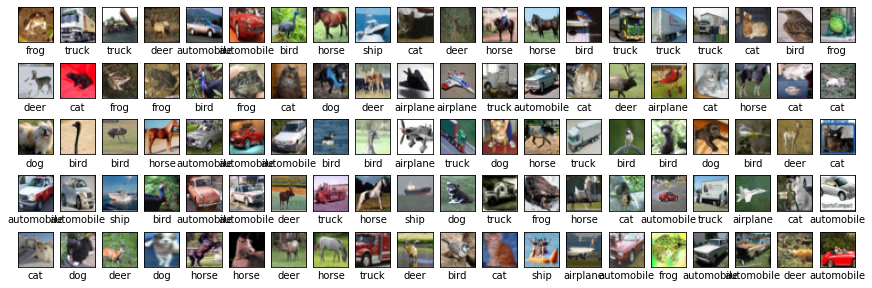

In [3]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
i=0
plt.figure(figsize=(15,5))
for i in range(100):
    plt.subplot(5,20,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(classes[y_train[i][0]])

plt.show()

In [4]:
accuracy = []

for k in range(1, 50):
  print("k: ", k)
  acc = []
  for f in range(5):
    validation_X, validation_Y = X_train[f*10000:(f+1)*10000], y_train[f*10000:(f+1)*10000]
    train_X = np.concatenate((X_train[:f*10000], X_train[(f+1)*10000:]), axis = 0)
    train_Y = np.concatenate((y_train[:f*10000], y_train[(f+1)*10000:]), axis = 0)
    cm = ce = 0         

    for i in range(len(validation_X)):
      L1_distance = []
      L2_distance = []

      for j in range(len(train_X)):
        
        # calculating distance between two images
        l1 = np.sum(np.absolute(np.subtract(validation_X[i], train_X[j])))

        # calculation distance between two images
        l2 = np.sqrt(np.sum((validation_X[i] - train_X[j])**2))

        L1_distance.append([l1, train_Y[j][0]])
        L2_distance.append([l2, train_Y[j][0]])
        
        if j == 300:
            break

      L1_distance = np.array(L1_distance)
      L1_distance = L1_distance[L1_distance[:, 0].argsort()]
      L2_distance = np.array(L2_distance)
      L2_distance = L2_distance[L2_distance[:, 0].argsort()]
      
      # for manhattan distance
      values = L1_distance[:k, 1]

      # print(values)
      most_frequent_value = np.argmax(np.bincount(values.astype('int32')))

      # print(most_frequent_value)
      if most_frequent_value == validation_Y[i]:
        cm += 1
        
      # for euclidean distance
      values = L2_distance[:k, 1]
      most_frequent_value = np.argmax(np.bincount(values.astype('int32')))
      if most_frequent_value == validation_Y[i]:
        ce += 1

      if i == 120:
        break

    acc.append([cm/100, ce/100])
  accuracy.append([acc, k])

#print(accuracy)


k:  1
k:  2
k:  3
k:  4
k:  5
k:  6
k:  7
k:  8
k:  9
k:  10
k:  11
k:  12
k:  13
k:  14
k:  15
k:  16
k:  17
k:  18
k:  19
k:  20
k:  21
k:  22
k:  23
k:  24
k:  25
k:  26
k:  27
k:  28
k:  29
k:  30
k:  31
k:  32
k:  33
k:  34
k:  35
k:  36
k:  37
k:  38
k:  39
k:  40
k:  41
k:  42
k:  43
k:  44
k:  45
k:  46
k:  47
k:  48
k:  49


C:\Users\JAMILI~1\AppData\Local\Temp/ipykernel_16392/4143657382.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  k = np.array(accuracy)[:,1]


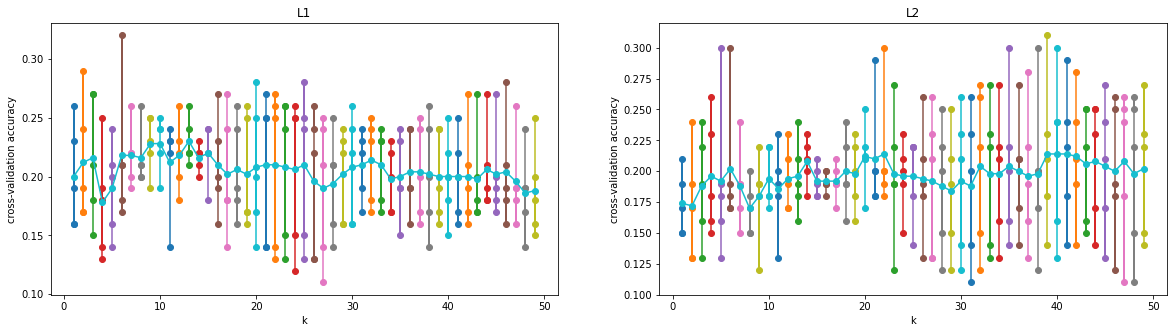

In [5]:
avg1 = []
avg2 = []
k = np.array(accuracy)[:,1]

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('L1')
for i in range(len(accuracy)):
  a = np.full((5), i+1, dtype=int)
  l1 = np.array(accuracy[i][0])[:,0]
  avg1.append(np.average(l1))
  plt.plot(a, l1, 'o-')
  
plt.plot(k, avg1, 'o-')
plt.xlabel('k')
plt.ylabel('cross-validation accuracy')


plt.subplot(1,2,2)
plt.title('L2')
for i in range(len(accuracy)):
  a = np.full((5), i+1, dtype=int)
  l2 = np.array(accuracy[i][0])[:,1]
  avg2.append(np.average(l2))
  plt.plot(a, l2, 'o-')

plt.plot(k, avg2, 'o-')
plt.xlabel('k')
plt.ylabel('cross-validation accuracy')

plt.show()